# Segundo notebook de ciencia de datos
- Óscar Alvarado
- Oscar Esquivel

# ScikitLearn.jl
[sklearn](https://scikitlearnjl.readthedocs.io/en/latest/)

In [25]:
using RDatasets: dataset

iris = dataset("datasets", "iris")

# ScikitLearn.jl espera arreglos pero también podemos utilizar DataFrames
X = convert(Array, iris[[:SepalLength, :SepalWidth, :PetalLength, :PetalWidth]])
y = convert(Array, iris[:Species])

┌ Info: Precompiling RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1278


150-element Array{String,1}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"
 "virginica"

In [26]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [8]:
#import Pkg; Pkg.add("ScikitLearn")
using ScikitLearn

@sk_import linear_model: LogisticRegression

PyObject <class 'sklearn.linear_model._logistic.LogisticRegression'>

In [20]:
model = LogisticRegression(fit_intercept=true, max_iter = 200)

fit!(model, X, y)

accuracy = sum(predict(model, X) .== y) / length(y)
println("accuracy: $accuracy")

accuracy: 0.9733333333333334


In [18]:
using ScikitLearn.CrossValidation: cross_val_score

cross_val_score(LogisticRegression(max_iter = 200), X, y; cv=5)

5-element Array{Float64,1}:
 0.9666666666666667
 1.0
 0.9333333333333333
 0.9666666666666667
 1.0

In [16]:
?LogisticRegression

search: LogisticRegression




    Logistic Regression (aka logit, MaxEnt) classifier.

    In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
    scheme if the 'multi_class' option is set to 'ovr', and uses the
    cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
    (Currently the 'multinomial' option is supported only by the 'lbfgs',
    'sag', 'saga' and 'newton-cg' solvers.)

    This class implements regularized logistic regression using the
    'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
    that regularization is applied by default**. It can handle both dense
    and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
    floats for optimal performance; any other input format will be converted
    (and copied).

    The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
    with primal formulation, or no regularization. The 'liblinear' solver
    supports both L1 and L2 regularization, with a d

In [17]:
using ScikitLearn.GridSearch: GridSearchCV

gridsearch = GridSearchCV(LogisticRegression(max_iter = 200), Dict(:C => 0.1:0.1:2.0))
fit!(gridsearch, X, y)
println("Mejor parámetro: $(gridsearch.best_params_)")

Mejor parámetro: Dict{Symbol,Any}(:C => 0.6)


## Flux.jl
[Flux](https://fluxml.ai/)

In [1]:
using Flux, Flux.Data.MNIST, Statistics
using Flux: onehotbatch, onecold, crossentropy, throttle
using Base.Iterators: repeated, partition
using Printf, BSON, BenchmarkTools
#using Pkg; Pkg.add(["Netpbm", "Images", "ImageFeatures"])
using Images, ImageFeatures # We have to Pkg.add("Netpbm") because our images are in pgm format
#import Pkg; Pkg.add(["ImageIO", "ImageMagick"])

In [2]:
using BenchmarkTools

Images in the train set: (60000,)
Images in the test set: (10000,)


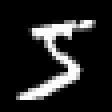

In [3]:
# Load labels and images from Flux.Data.MNIST
# Train set: images used to estimate the CNN
# Load data on gpu (if enabled)
train_labels = MNIST.labels(:train);
train_imgs = MNIST.images(:train);

# Test set: images used to see how well the CNN perform "out-of-the-sample"
test_imgs = MNIST.images(:test)
test_labels = MNIST.labels(:test)

println("Images in the train set: $(size(train_imgs))")
println("Images in the test set: $(size(test_imgs))")

# Visualization of one digit
NROWS, NCOLS = 28, 28
a = reshape(train_imgs[1], NROWS, NCOLS)

In [4]:
imgs = MNIST.images(:train);
labels = onehotbatch(MNIST.labels(:train), 0:9);

# Partition into batches of size 1,000
train = [(cat(float.(imgs[i])..., dims = 4), labels[:,i])
         for i in partition(1:60_000, 1000)];

In [5]:
tX = cat(float.(MNIST.images(:test)[1:1000])..., dims = 4)
tY = onehotbatch(MNIST.labels(:test)[1:1000], 0:9);

In [6]:
# Model definition
# See: https://github.com/FluxML/model-zoo/blob/master/vision/mnist/conv.jl
model = Chain(
    # First convolution, operating upon a 28x28 image
    Conv((3, 3), 1=>16, pad=(1,1), relu),
    MaxPool((2,2)), #maxpooling

    # Second convolution, operating upon a 14x14 image
    Conv((3, 3), 16=>32, pad=(1,1), relu),
    MaxPool((2,2)), #maxpooling

    # Third convolution, operating upon a 7x7 image
    Conv((3, 3), 32=>32,pad=(1,1), relu),
    MaxPool((2,2)),

    # Reshape 3d tensor into a 2d one, at this point it should be (3, 3, 32, N)
    # which is where we get the 288 in the `Dense` layer below:
    x -> reshape(x, :, size(x, 4)),
    Dense(288, 10),

    # Softmax to get probabilities
    softmax,
)

Chain(Conv((3, 3), 1=>16, relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), Conv((3, 3), 16=>32, relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), Conv((3, 3), 32=>32, relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), #3, Dense(288, 10), softmax)

In [7]:
# Batching 
# See: https://github.com/FluxML/model-zoo/blob/master/vision/mnist/conv.jl
# Bundle images together with labels and group into minibatchess
function make_minibatch(X, Y, idxs)
    X_batch = Array{Float32}(undef, size(X[1])..., 1, length(idxs))
    for i in 1:length(idxs)
        X_batch[:, :, :, i] = Float32.(X[idxs[i]])
    end
    Y_batch = onehotbatch(Y[idxs], 0:9)
    return (X_batch, Y_batch)
end
# The CNN only "sees" 128 images at each training cycle:
batch_size = 128
mb_idxs = partition(1:length(train_imgs), batch_size)
# train set in the form of batches
train_set = [make_minibatch(train_imgs, train_labels, i) for i in mb_idxs];
# train set in one-go: used to calculate accuracy with the train set
train_set_full = make_minibatch(train_imgs, train_labels, 1:length(train_imgs));
# test set: to check we do not overfit the train data:
test_set = make_minibatch(test_imgs, test_labels, 1:length(test_imgs));

In [8]:
# Loss function
# See: https://github.com/FluxML/model-zoo/blob/master/vision/mnist/conv.jl
# `loss()` calculates the crossentropy loss between our prediction `y_hat`
function loss(x, y)
    # Add some noise to the image
    # we reduce the risk of overfitting the train sample by doing so:
    x_aug = x .+ 0.1f0*randn(eltype(x), size(x))

    y_hat = model(x_aug)
    return crossentropy(y_hat, y)
end
accuracy(x, y) = mean(onecold(model(x)) .== onecold(y))

# ADAM optimizer
opt = ADAM(0.001);

In [13]:
# Training loop
# See: https://github.com/FluxML/model-zoo/blob/master/vision/mnist/conv.jl
best_acc = 0.0
last_improvement = 0
accuracy_target = 0.97 #Set an accuracy target. When reached, we stop training.
max_epochs = 100 #Maximum
for epoch_idx in 1:100
    global best_acc, last_improvement
    # Train for a single epoch
    @btime Flux.train!(loss, Flux.params(model), train_set, opt)

    # Calculate accuracy:
    acc = accuracy(train_set_full...)
    @info(@sprintf("[%d]: Train accuracy: %.4f", epoch_idx, acc))
    
    # Calculate accuracy:
    acc = accuracy(test_set...)
    @info(@sprintf("[%d]: Test accuracy: %.4f", epoch_idx, acc))

    # If our accuracy is good enough, quit out.
    if acc >= accuracy_target
        @info(" -> Early-exiting: We reached our target accuracy of $(accuracy_target*100)%")
        break
    end

    if epoch_idx - last_improvement >= 10
        @warn(" -> We're calling this converged.")
        break
    end
end

  38.728 s (2180716 allocations: 26.35 GiB)


┌ Info: [1]: Train accuracy: 0.9871
└ @ Main In[13]:14
┌ Info: [1]: Test accuracy: 0.9859
└ @ Main In[13]:18
┌ Info:  -> Early-exiting: We reached our target accuracy of 97.0%
└ @ Main In[13]:22


In [14]:
# Get predictions and convert data to Array: 
pred = model(test_set[1]); 

# Function to get the row index of the max value: 
f1(x) = getindex.(argmax(x, dims=1), 1) # Final predicted value is the one with the maximum probability: 
pred = f1(pred) .- 1; #minus 1, because the first digit is 0 (not 1)

In [15]:
println("Predicted value = $(pred[1])")

Predicted value = 7


In [16]:
test_labels[1]

7

# Usando la GPU!

### Cargando nuestros datos

In [1]:
#import Pkg; Pkg.add("CUDA")
using CUDA
#CUDA.allowscalar(false)

In [2]:
#using Pkg; Pkg.add("Flux")
#import Pkg; Pkg.add("BSON")
using Flux, Flux.Data.MNIST, Statistics
using Flux: onehotbatch, onecold, crossentropy, throttle
using Base.Iterators: partition
using Printf, BSON
using BenchmarkTools

imgs =  Flux.Data.MNIST.images(:train);
labels = onehotbatch( Flux.Data.MNIST.labels(:train), 0:9);

# Partition into batches of size 1,000
train = [(cat(float.(imgs[i])..., dims = 4), labels[:,i])
         for i in partition(1:60_000, 64)];

In [3]:
train = gpu.(train);

In [4]:
# Prepare test set (first 1,000 images)
tX = cat(float.(Flux.Data.MNIST.images(:test)[1:500])..., dims = 4) |> gpu;
tY = onehotbatch(Flux.Data.MNIST.labels(:test)[1:500], 0:9) |> gpu;

### Haciendo el modelo!

In [5]:
model = Chain(
  # First convolution, operating upon a 192×192image
    Conv((3, 3), 1=>16, pad=(1,1), relu),
    MaxPool((2,2)), #maxpooling

    # Second convolution, operating upon a 96×96 image
    Conv((3, 3), 16=>32, pad=(1,1), relu),
    MaxPool((2,2)), #maxpooling

    # Third convolution, operating upon a 48×48 image
    Conv((3, 3), 32=>32,pad=(1,1), relu),
    MaxPool((2,2)),

    # Reshape 3d tensor into a 2d one, at this point it should be (24, 24, 32, N)
    # which is where we get the 18432 in the `Dense` layer below:
    x -> reshape(x, :, size(x, 4)),
    Dense(288, 10), softmax) |> gpu

Chain(Conv((3, 3), 1=>16, relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), Conv((3, 3), 16=>32, relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), Conv((3, 3), 32=>32, relu), MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2)), #3, Dense(288, 10), softmax)

In [6]:
#= Loss function
# See: https://github.com/FluxML/model-zoo/blob/master/vision/mnist/conv.jl
# `loss()` calculates the crossentropy loss between our prediction `y_hat`
loss(x, y) = crossentropy(model(x), y)
accuracy1(x, y) = mean(onecold(model(x)) .== onecold(y))
evalcb = throttle(() -> @show(accuracy1(tX, tY)), 10)

# ADAM optimizer
opt = ADAM(0.001);

In [7]:
function loss(x, y)
    # Add some noise to the image
    # we reduce the risk of overfitting the train sample by doing so:
    x_aug = x .+ 0.1f0*gpu(randn(eltype(x), size(x)))

    y_hat = model(x_aug)
    return crossentropy(y_hat, y)
end
accuracy1(x, y) = mean(onecold(model(x)) .== onecold(y))
evalcb = throttle(() -> @show(accuracy1(tX, tY)), 10)

# ADAM optimizer
opt = ADAM(0.001);

In [8]:
# Training loop
# See: https://github.com/FluxML/model-zoo/blob/master/vision/mnist/conv.jl
best_acc = 0.0
last_improvement = 0
accuracy_target = 0.97  #Set an accuracy target. When reached, we stop training.
max_epochs = 200 #Maximum
for epoch_idx in 1:max_epochs
    global best_acc, last_improvement
    # Train for a single epoch
    println("Epoch $(epoch_idx)")
    @btime Flux.train!(loss, Flux.params(model), train, opt) 
    #Flux.train!(loss, Flux.params(model), train, opt) 

    # Calculate accuracy:
    #acc = accuracy1(train_set_full...)
    #@info(@sprintf("[%d]: Train accuracy: %.4f", epoch_idx, acc))

    # Calculate accuracy:
    acc = accuracy1(tX, tY)
    @info(@sprintf("[%d]: Test accuracy: %.4f", epoch_idx, acc))

    # If our accuracy is good enough, quit out.
    if acc >= accuracy_target
        @info(" -> Early-exiting: We reached our target accuracy of $(accuracy_target*100)%")
        @show epoch_idx
        break
    end

    if epoch_idx - last_improvement >= max_epochs
        @warn(" -> We're calling this converged.")
        break
    end
end

Epoch 1
  2.742 s (7180960 allocations: 697.83 MiB)


┌ Warning: Performing scalar operations on GPU arrays: This is very slow, consider disallowing these operations with `allowscalar(false)`
└ @ GPUArrays /home/oscar/.julia/packages/GPUArrays/WV76E/src/host/indexing.jl:43
┌ Info: [1]: Test accuracy: 0.9920
└ @ Main In[8]:20


epoch_idx = 1


┌ Info:  -> Early-exiting: We reached our target accuracy of 97.0%
└ @ Main In[8]:24


In [9]:
# Get predictions and convert data to Array: 
pred = model(tX); 

# Function to get the row index of the max value: 
f1(x) = getindex.(argmax(x, dims=1), 1) # Final predicted value is the one with the maximum probability: 
pred = f1(pred) .- 1; #minus 1, because the first digit is 0 (not 1)

println("Predicted value = $(pred[1])")

Predicted value = 7


In [12]:
tY[8]

true